In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
covid_data = pd.read_csv("D:\jnb-demo\covid-variants.csv")

In [8]:
covid_data.head() # the number is not specified, so it'll return the first 5 rows by default

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


In [9]:
covid_data.head(10) # returns the first 10 rows 

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3
5,Angola,2020-07-06,B.1.177,0,0.0,3
6,Angola,2020-07-06,B.1.221,0,0.0,3
7,Angola,2020-07-06,B.1.258,0,0.0,3
8,Angola,2020-07-06,B.1.367,0,0.0,3
9,Angola,2020-07-06,B.1.620,0,0.0,3


In [11]:
plain_covid = covid_data.drop(columns = ["date", "variant"]) # drop = eliminate
plain_covid.head()
#DataFrame.drop(
  # labels=None, 
  #  axis=0, 
  # columns=None, 
  #  level=None, 
  # inplace=False, 
  #  errors='raise'
# )


,location,num_sequences,perc_sequences,num_sequences_total
0,Angola,0,0.0,3
1,Angola,0,0.0,3
2,Angola,0,0.0,3
3,Angola,0,0.0,3
4,Angola,0,0.0,3


In [14]:
place = covid_data.location.unique() # get all unique (no repeated) values of "location" 
num_sequence = []
num_total = []
for i in place:
  x = plain_covid[plain_covid.location.values == i]
  num_seq = sum(x.num_sequences)
  num_tot = sum(x.num_sequences_total)
  num_sequence.append(num_seq) # add values of num_seq to num_sequence's array
  num_total.append(num_tot) # add values of num_tot to num_total

covid_locations = pd.DataFrame({"location":place, "num_sequences_processed":num_sequence, "acknowledged_num_sequences_total":num_total})
print(covid_locations)

          location  num_sequences_processed  acknowledged_num_sequences_total
0           Angola                     1325                             25320
1        Argentina                    10689                            201864
2            Aruba                     3302                             72000
3        Australia                    62668                           1132776
4          Austria                    14627                            301920
..             ...                      ...                               ...
116  United States                  2420758                          49960248
117        Uruguay                     1189                             16368
118        Vietnam                     1811                             43320
119         Zambia                     1565                             26808
120       Zimbabwe                      871                             16464

[121 rows x 3 columns]


In [15]:
new_index = covid_locations["acknowledged_num_sequences_total"].sort_values(ascending=False).index.values # sort acknowledged_num_sequences_total in descending order
sorted_data = covid_locations.reindex(new_index) # reindex covid locations with new_index
sorted_data.head()

,location,num_sequences_processed,acknowledged_num_sequences_total
116,United States,2420758,49960248
115,United Kingdom,1703122,37427568
37,Germany,358070,7851432
25,Denmark,335124,6728880
17,Canada,226219,4365240


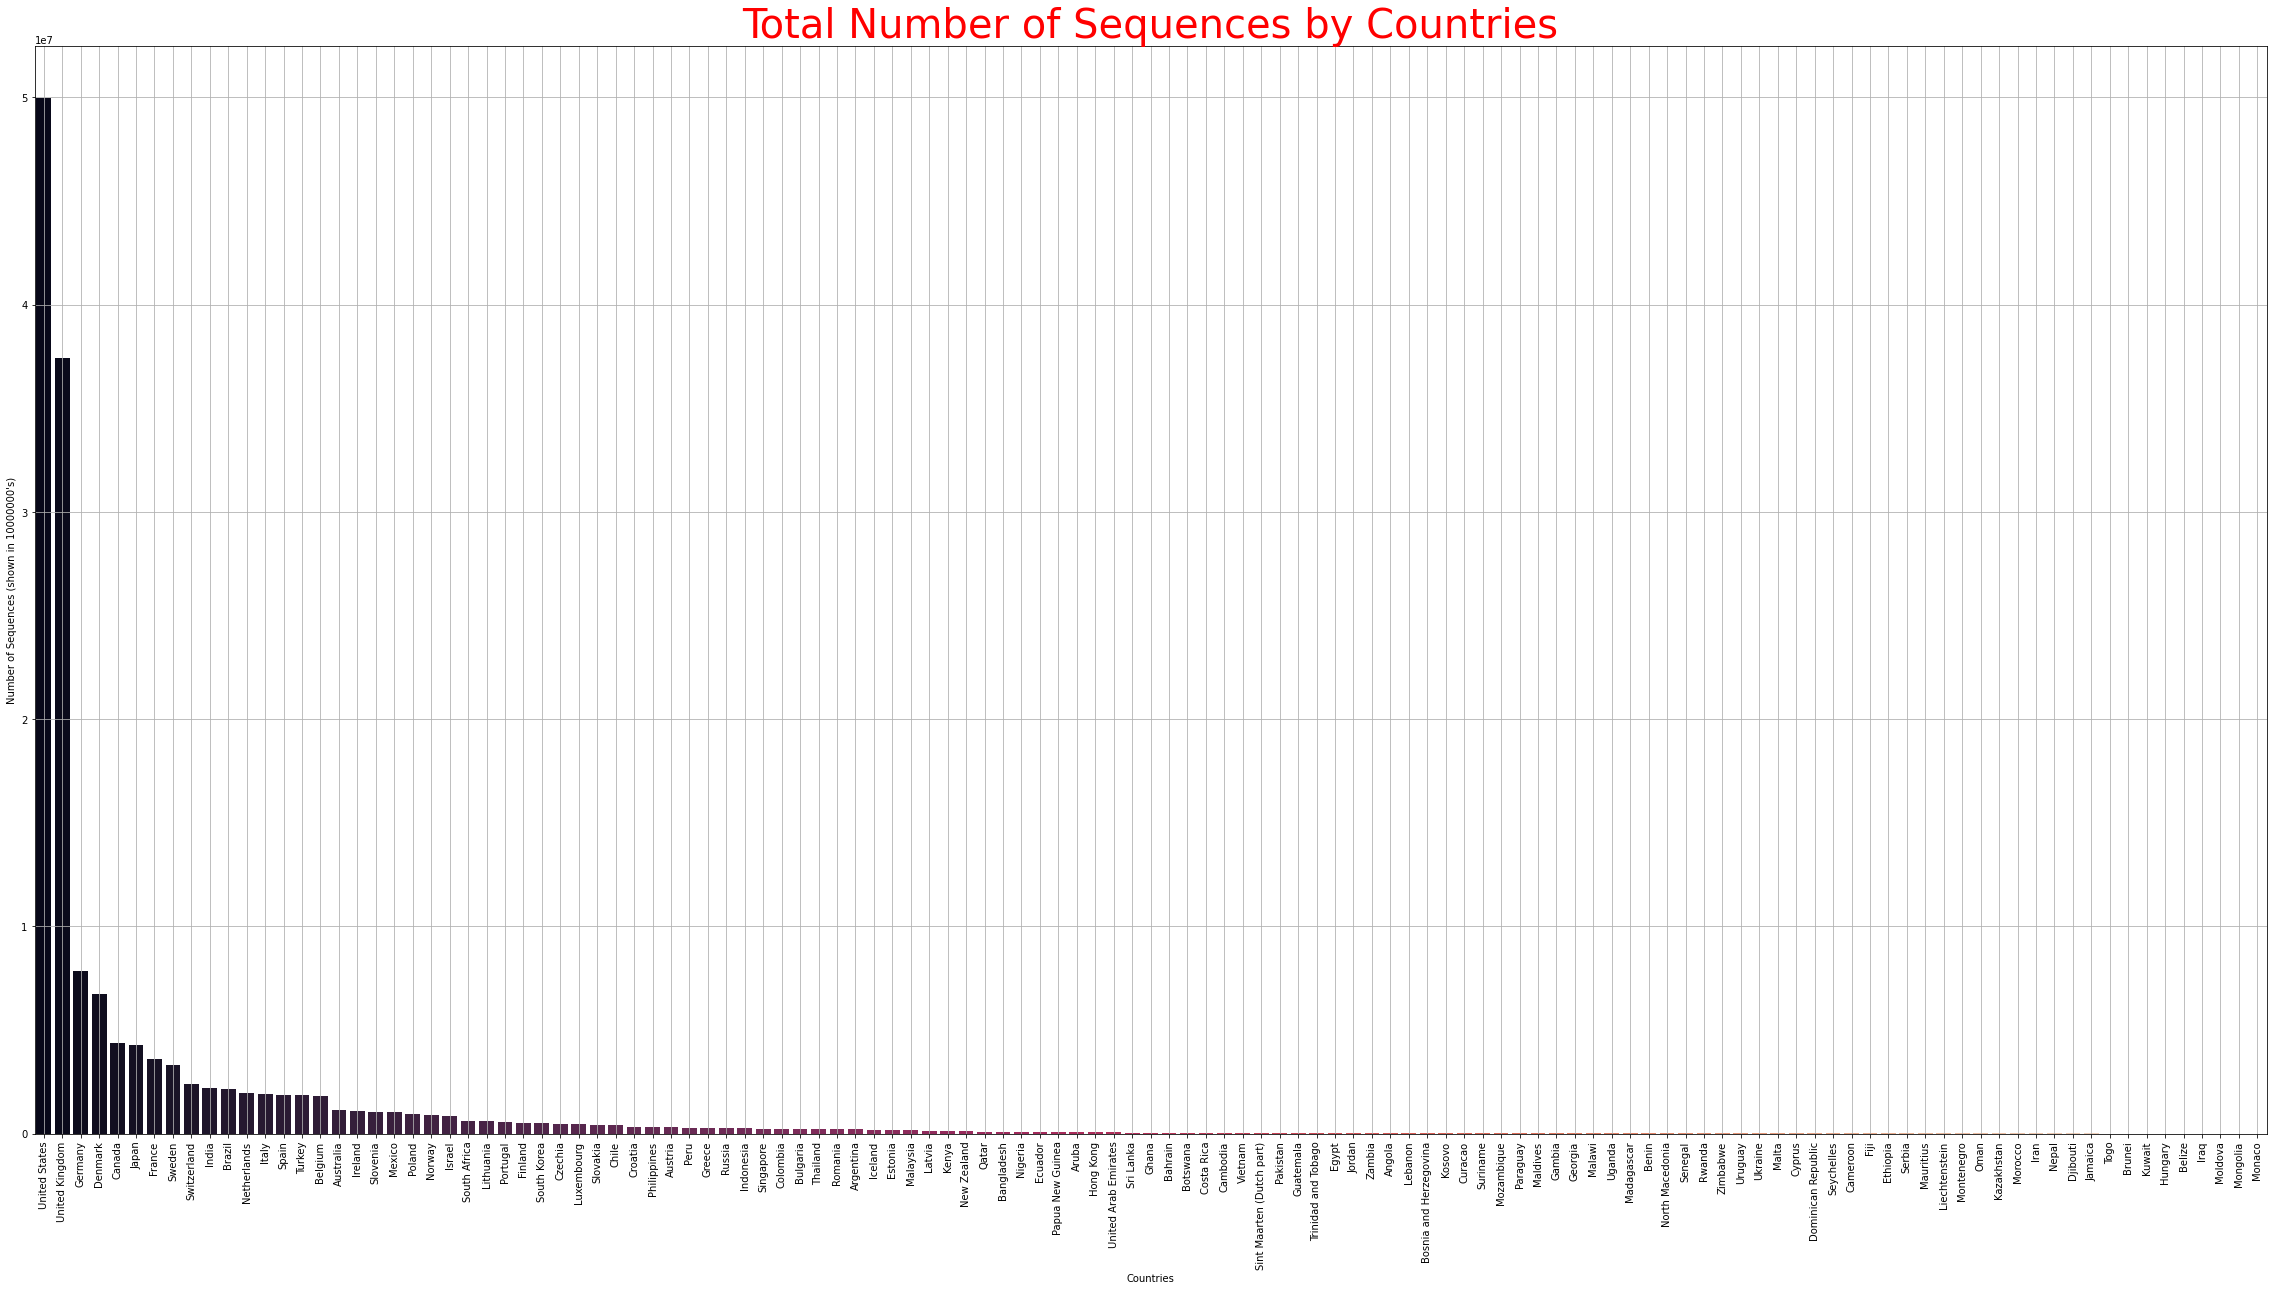

In [21]:
fig, axes = plt.subplots(figsize=(40,20))
# plot the data
sns.barplot(
x=sorted_data.location, # assign 'location' to the x axis
y=sorted_data["acknowledged_num_sequences_total"], # assign 'acknowledged_num_sequences_total to the y axis
palette= "rocket"
)
plt.xticks(rotation=90) # rotate each of the x values by 90degree clockwise to make it readable
plt.xlabel("Countries") # label for x axis
plt.ylabel("Number of Sequences (shown in 10000000's)") # label for y axis
plt.title("Total Number of Sequences by Countries", color="red", fontsize=40) # plot title
plt.grid() # show plot grid
plt.show() # show plot
